# **Logistic Regression**

It is easier to confuse Logistic Regression as a Regression algorithm due to the “Regression” attached to its name, but as mentioned earlier, it is a pure classification model that can predict dependent variables that falls into specific categories.

To put it in a much simpler way, Logistic regression works when your dependent variable(s) is/are categories like yes or no, male or female or variables that fall into multiple categories like States, Currencies, Brands or Countries etc.

**The Logistic Regression Equation:**

The logistic regression equation is derived from the Linear regression and Sigmoid function.

The Linear equation gives us :

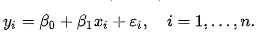

Sigmoid function after substituting for y from the above equation  :

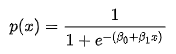

The resulting solution is called the Logistic Regression Equation

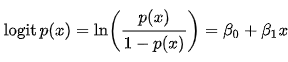

Now let us try to understand the equation with one of the simplest illustrations available on the internet. The following graph depicts the plot between the time a student spends studying versus whether he/she passes or fails the test.

Clearly what we are trying to predict falls in a binary category since there are only two possible outcomes either the student fails(0) or passes(1).

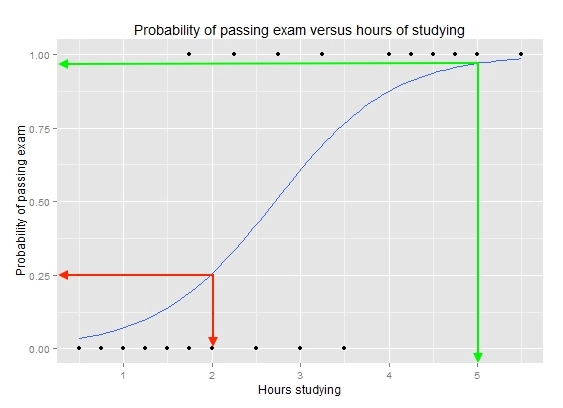

The logistic regression equation represented by the blue line in the graph determines the category by pointing towards the probability. Consider from the given graph, if a student studies for only 2 hours the probability for passing the test is only 0.25 or 25 %, represented by the red lines. If the student studies for 5 hours the probability of passing the test is above 0.9 or 90%. Thus probability determines whether the student passes or fails. For predictive analysis, we fix a critical value or threshold probability score, say for example 50% or 0.5. If the probability falls above 0.5 the student passes otherwise the student fails.

## **Implementation**

### **The Data Set**

The dataset used in this article is taken from Kaggle that is publically available as [the Fake and real news dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). This data set has two CSV files containing true and fake news. Each having Title, text, subject and date attributes. There are 21417 true news data and 23481 fake news data given in the true and fake CSV files respectively. To train the model for classification, we will add a column in both the datasets as real or fake. 

### **Preprocessing and Algorithm**

First, we will import all the required libraries.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

After importing the libraries, we will read the CSV files in the program.

In [ ]:
#Reading CSV files
true = pd.read_csv("https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/logistic_regression_custom_data/Logistic_Regression_True.csv")
fake = pd.read_csv("https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/logistic_regression_custom_data/Logistic_Regression_Fake.csv")


Here, we will add fake and true labels as the target attribute with both the datasets and create our main data set that combines both fake and real datasets.

In [ ]:
#Specifying fake and real
fake['target'] = 'fake'
true['target'] = 'true'
#News dataset
news = pd.concat([fake, true]).reset_index(drop = True)
news.head()

After specifying the main dataset, we will define the train and test data set by splitting the main data set. We have kept 20% of the data for testing the classifiers. This can be adjusted accordingly.

In [ ]:
#Train-test split
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=1)

In the next step, we will classify the news texts as fake or true using classification algorithms. We will perform this classification using Logistic Regression. First, we will obtain the term frequencies and count vectorizer that will be included as input attributes for the classification model and the target attribute that we have defined above will work as the output attribute. To bind the count vectorizer, TF-IDF and classification model together, the concept of the pipeline is used. A machine learning pipeline is used to help automate machine learning workflows. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.


Now, we will classify the news text using the Logistic Regression model and evaluate its performance using evaluation matrices.

In [ ]:
#Logistic regression classification
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

model_lr = pipe1.fit(x_train, y_train)
lr_pred = model_lr.predict(x_test)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, lr_pred)*100,2)))
print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, lr_pred))
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, lr_pred))


You can learn all performance measures used in classification in this separate notebook.

Please refer these articles:
> * [Important Regression Techniques](https://analyticsindiamag.com/a-beginners-guide-to-regression-techniques/) 
> * [Fake News Classification](https://analyticsindiamag.com/hands-on-guide-to-predict-fake-news-using-logistic-regression-svm-and-naive-bayes-methods/)